# Syntax parser in NLTK




## Context free Grammer

Context Free Grammar is the ability of a set of rules to generate well-formed sentences from it.

Reading from left to right, the left part represents the syntactical POS and at the right side represents its alternative.

In [1]:
import nltk
from nltk.tree import Tree
import matplotlib.pyplot as plt

In [ ]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I' | Det
VP -> V NP | VP PP | NP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [47]:
grammar

<Grammar with 15 productions>

In [15]:
grammar.start()

S

In [41]:
grammar.productions()

[S -> NP VP,
 PP -> P NP,
 NP -> Det N,
 NP -> Det N PP,
 NP -> 'I',
 NP -> Det,
 VP -> V NP,
 VP -> VP PP,
 Det -> 'an',
 Det -> 'my',
 N -> 'elephant',
 N -> 'pajamas',
 V -> 'shot',
 P -> 'in']

In [48]:
lh_np = grammar.productions(lhs=nltk.Nonterminal("NP"))
print(lh_np)
rh_np = grammar.productions(rhs=nltk.Nonterminal("Det"))
print(rh_np)

[NP -> Det N, NP -> Det N PP, NP -> 'I', NP -> Det]
[NP -> Det N, NP -> Det N PP, NP -> Det]


### ChartParser
Chart parsing is an example of dynamic programming – for example, the Left Corner (LC) parser above is not simply an LC parser, but an LC chart parser.
Chart parsers make use of dynamic programming in the sense that every time we parse a sub-part of our input, we store the intermediate results and re-use them when appropriate. That is, unlike the top-down algorithm above, we never do the same work multiple times.

The first time we build a structure, e.g., an NP, based on some sub-part of our input, we saveit in a table, then we look it up when we need to use it as a subconstituent of higher phrases.


In [49]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
sent1 = ['an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(grammar)
trees = list(parser.parse(sent))
trees1 = list(parser.parse(sent1))

In [50]:
len(trees1)

0

In [32]:
for tree in trees1:
    print(tree)

In [21]:
!pip install svgling

Error processing line 1 of /home/tilak/.local/lib/python3.10/site-packages/vision-1.0.0-nspkg.pth:

  Traceback (most recent call last):
    File "/usr/lib/python3.10/site.py", line 192, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 568, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 526.2 kB/s eta 0:00:00a 0:00:01


In [ ]:
trees[0]

IndexError: list index out of range

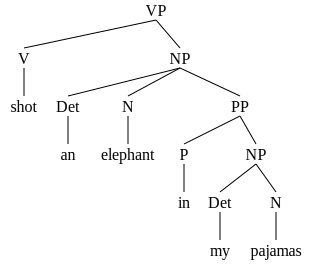

In [23]:
tree[1]

## Parsing

In [26]:
import nltk
from nltk.tree import Tree
import matplotlib.pyplot as plt

In [27]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/tilak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tilak/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## RegexpParser

In [15]:
# parsing using Regular expression

from nltk import pos_tag, word_tokenize, RegexpParser

# String to parse
to_parse = "This tree is illustrating the constituency relation"

# Find all parts of speech in above sentence
tagged_parts = pos_tag(word_tokenize(to_parse))

# Defining grammar on basis of which we 've to extract
grammar = r"""NP: {<DT>?<JJ>*<NN>}
P: {<IN>}
V: {<V.*>}
PP: {<p> <NP>}
VP: {<V> <NP|PP>*}"""

#Extracting all parts of speech
parser = RegexpParser(grammar)

# Print all parts of speech in above sentence
output = parser.parse(tagged_parts)
print("\nAfter Extracting the parts\n\n", output,"\n")


After Extracting the parts

 (S
  (NP This/DT tree/NN)
  (VP (V is/VBZ))
  (VP
    (V illustrating/VBG)
    (NP the/DT constituency/NN)
    (NP relation/NN))) 



In [16]:
!pip install svgling

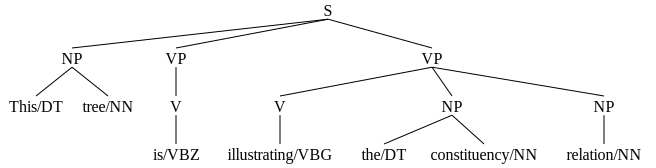

In [17]:
# tree = Tree.fromstring('(S (NP this tree) (VP (V is) (AdjP pretty)))')
# display(tree)

tree = Tree.fromstring(str(output))
display(tree)

### POS Tagging and parsing

In [18]:
#PoS tagging example :

sentence = "A very beautiful young lady is walking on the beach"

#Tokenizing words :
tokenized_words = word_tokenize(sentence)

for words in tokenized_words:
    tagged_words = nltk.pos_tag(tokenized_words)

tagged_words

[('A', 'DT'),
 ('very', 'RB'),
 ('beautiful', 'JJ'),
 ('young', 'JJ'),
 ('lady', 'NN'),
 ('is', 'VBZ'),
 ('walking', 'VBG'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('beach', 'NN')]

(S
  A/DT
  very/RB
  (NP beautiful/JJ young/JJ lady/NN)
  is/VBZ
  walking/VBG
  on/IN
  (NP the/DT beach/NN))


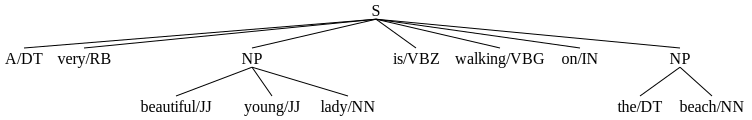

In [19]:
#Extracting Noun Phrase from text :

# ? - optional character
# * - 0 or more repetations
grammar = "NP : {<DT>?<JJ>*<NN>} "

#Creating a parser :
parser = nltk.RegexpParser(grammar)

#Parsing text :
output = parser.parse(tagged_words)
print (output)
display(Tree.fromstring(str(output)))